In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [1]:
!wget https://download1640.mediafire.com/qxa607z079agj4niTAtYLaG-haeMgnm5YZ3zZAfHO-GZDsr2YB5e49CjYmC-kBuD9jIQRjxdRfldVDz85QFKOJ3zJyEfWZZTAXcc8zFUtyLkZHK6oSFRMYJ7HGXvo-LNgbsPOWyQEdYCQoTiSN0-M1y7WdaSOuQHE-fi3U5ChQ6X/vo5pmleyavmgzsq/ASL_Dataset_redim.zip

--2024-10-08 18:01:31--  https://download1640.mediafire.com/qxa607z079agj4niTAtYLaG-haeMgnm5YZ3zZAfHO-GZDsr2YB5e49CjYmC-kBuD9jIQRjxdRfldVDz85QFKOJ3zJyEfWZZTAXcc8zFUtyLkZHK6oSFRMYJ7HGXvo-LNgbsPOWyQEdYCQoTiSN0-M1y7WdaSOuQHE-fi3U5ChQ6X/vo5pmleyavmgzsq/ASL_Dataset_redim.zip
Resolving download1640.mediafire.com (download1640.mediafire.com)... 199.91.152.140
Connecting to download1640.mediafire.com (download1640.mediafire.com)|199.91.152.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 624608165 (596M) [application/zip]
Saving to: ‘ASL_Dataset_redim.zip’

ASL_Dataset_redim.z 100%[===================>] 595.67M  8.33MB/s    in 1m 47s  

2024-10-08 18:03:19 (5.55 MB/s) - ‘ASL_Dataset_redim.zip’ saved [624608165/624608165]



In [2]:
!unzip ASL_Dataset_redim.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: content/ASL_Dataset_Redim/H/H1304.jpg  
  inflating: content/ASL_Dataset_Redim/H/1566.jpg  
  inflating: content/ASL_Dataset_Redim/H/1409.jpg  
  inflating: content/ASL_Dataset_Redim/H/H802.jpg  
  inflating: content/ASL_Dataset_Redim/H/H2416.jpg  
  inflating: content/ASL_Dataset_Redim/H/H175.jpg  
  inflating: content/ASL_Dataset_Redim/H/2871.jpg  
  inflating: content/ASL_Dataset_Redim/H/2639.jpg  
  inflating: content/ASL_Dataset_Redim/H/2032.jpg  
  inflating: content/ASL_Dataset_Redim/H/H2256.jpg  
  inflating: content/ASL_Dataset_Redim/H/2601.jpg  
  inflating: content/ASL_Dataset_Redim/H/H881.jpg  
  inflating: content/ASL_Dataset_Redim/H/H1001.jpg  
  inflating: content/ASL_Dataset_Redim/H/H1236.jpg  
  inflating: content/ASL_Dataset_Redim/H/120.jpg  
  inflating: content/ASL_Dataset_Redim/H/1733.jpg  
  inflating: content/ASL_Dataset_Redim/H/2242.jpg  
  inflating: content/ASL_Dataset_Redim/H/1313.jpg  

In [2]:
!pip install np_utils

In [3]:
import tensorflow as tf
# Suprimir warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# El import está en desuso, importar cómo lo hice abajo.
# from keras.utils import np_utils

In [5]:
carpeta_base = '/content/content/ASL_Dataset_Redim'
carpeta_entrenamiento = os.path.join(carpeta_base, 'Train')
carpeta_pruebas = os.path.join(carpeta_base, 'Test')

In [38]:
alto_entradas = 200
ancho_entradas = 200
batch_size = 256
epochs = 15

In [37]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.25 # 20%
)

In [9]:
train_generator = datagen.flow_from_directory(
    carpeta_base,
    target_size=(alto_entradas, ancho_entradas),
    batch_size=batch_size,
    class_mode='categorical',  # Nuestor problema es multiclase
    shuffle=True,
    color_mode='rgb',  # Hay que asegurar que las imágenes se carguen en RGB
    subset='training',
)

# Hacemos el de Pruebas ahora
test_generator = datagen.flow_from_directory(
    carpeta_base,
    target_size=(alto_entradas, ancho_entradas),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,  # No mezclar para evaluar correctamente
    color_mode='rgb',  # Hay que asegurar que las imágenes se carguen en RGB
    subset='validation',
)

Found 132542 images belonging to 28 classes.
Found 33128 images belonging to 28 classes.


In [10]:
train_generator.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'Nothing': 14,
 'O': 15,
 'P': 16,
 'Q': 17,
 'R': 18,
 'S': 19,
 'Space': 20,
 'T': 21,
 'U': 22,
 'V': 23,
 'W': 24,
 'X': 25,
 'Y': 26,
 'Z': 27}

In [36]:
def _conv_model():
  #se creal el modelo
  model = Sequential()
  #se agrega nuestro primer "combo" de capa convolucional + pooling
  model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(200, 200, 3)))
  model.add(MaxPooling2D())
  #2° capa conv + pooling
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D())
  #3° capa conv + pooling
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D())
  #capa droopout
  model.add(Dropout(0.5))
  #capa flatten
  model.add(Flatten())
  #capa oculta
  model.add(Dense(128, activation='relu'))
  #capa de salida
  model.add(Dense(28, activation='softmax'))
  #copilar modelo
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  #devolver
  return model

In [ ]:
model = _conv_model()

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    verbose=2
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1036/1036 - 407s - 393ms/step - accuracy: 0.8378 - loss: 0.5271 - val_accuracy: 0.8767 - val_loss: 0.4290
Epoch 2/15
1036/1036 - 436s - 421ms/step - accuracy: 0.9801 - loss: 0.0626 - val_accuracy: 0.9289 - val_loss: 0.2889
Epoch 3/15
1036/1036 - 370s - 358ms/step - accuracy: 0.9882 - loss: 0.0356 - val_accuracy: 0.9404 - val_loss: 0.2585
Epoch 4/15
1036/1036 - 411s - 396ms/step - accuracy: 0.9919 - loss: 0.0244 - val_accuracy: 0.9445 - val_loss: 0.2776
Epoch 5/15
1036/1036 - 440s - 425ms/step - accuracy: 0.9924 - loss: 0.0229 - val_accuracy: 0.9445 - val_loss: 0.2601
Epoch 6/15


In [13]:
scores = model.evaluate(test_generator)
print("Accuracy: %.2f%%" % (scores[1]*100))

259/259 ━━━━━━━━━━━━━━━━━━━━ 51s 195ms/step - accuracy: 0.9426 - loss: 0.3806
Accuracy: 94.23%


In [15]:
model.save('modelo_arq_4.h5')

In [16]:
model.save('modelo_arq_4.keras')

In [28]:
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing import image

In [26]:
images, labels = next(train_generator)

In [27]:
print(f"Dimensiones del batch de imágenes: {images.shape}")  # (batch_size, IMG_HEIGHT, IMG_WIDTH, canales)

Dimensiones del batch de imágenes: (128, 200, 200, 3)


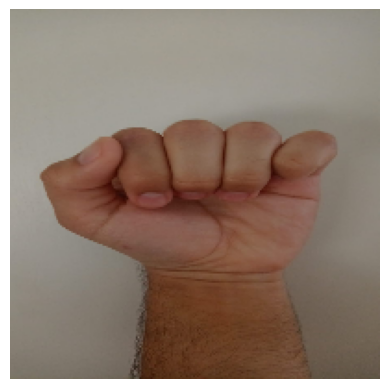

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
La imagen '/content/data/a_nueva_2.jpg' ha sido clasificada como: **Space**


In [35]:
class_indices = train_generator.class_indices
classes = {v: k for k, v in class_indices.items()}

# Iterar sobre los archivos subidos
for filename in ["/content/data/a_nueva_2.jpg"]:
    img_path = filename

    # Cargar la imagen con el tamaño adecuado
    img = image.load_img(img_path, target_size=(200, 200), color_mode='rgb')

    # Convertir la imagen a un array numpy
    img_array = image.img_to_array(img)

    # Escalar los valores de píxeles (asumiendo que durante el entrenamiento escalaste por 1./255)
    img_array /= 255.0

    # Añadir una dimensión extra para el batch (el modelo espera un lote de imágenes)
    img_array = np.expand_dims(img_array, axis=0)

    # Mostrar la imagen
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Realizar la predicción
    predictions = model.predict(img_array)

    # Obtener el índice de la clase con mayor probabilidad
    predicted_class_index = np.argmax(predictions, axis=1)[0]

    # Obtener el nombre de la clase
    predicted_class = classes[predicted_class_index]

    # Mostrar el resultado
    print(f"La imagen '{filename}' ha sido clasificada como: **{predicted_class}**")